<a href="https://www.kaggle.com/code/stanislavyurchenko/lab-2-spotify?scriptVersionId=213697655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Задание №2 "Spotify"

## Импорт библиотек

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

from sklearn.inspection import permutation_importance

import tensorflow as tf

from tensorflow import keras

## Загрузка данных

In [2]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

**Описание столбцов**

<ul><li><strong>artists</strong>: Имя или имена исполнителя(ей) трека.</li><li><strong>album_name</strong>: Название альбома, в котором присутствует трек.</li><li><strong>track_name</strong>: Название трека или название песни.</li><li><strong>popularity</strong>: Оценка популярности трека, обычно основанная на метриках прослушиваний.</li><li><strong>duration_ms</strong>: Продолжительность трека в миллисекундах.</li><li><strong>explicit</strong>: Указатель на наличие откровенного (нецензурного) контента; обычно представляется как "True" или "False".</li><li><strong>danceability</strong>: Показатель от 0.0 до 1.0, описывающий, насколько трек подходит для танцев, основываясь на темпе, стабильности ритма, силе удара и т.д.</li><li><strong>energy</strong>: Показатель от 0.0 до 1.0, отражающий интенсивность и активность трека.</li><li><strong>key</strong>: Тональность трека, представленная в виде целого числа, соответствующего музыкальным нотам (0=До, 1=До#/Реb и т.д.).</li><li><strong>loudness</strong>: Общая громкость трека в децибелах (дБ), где более высокие значения означают более громкие треки.</li><li><strong>mode</strong>: Модальность трека, где 1 указывает на мажор, а 0 — на минор.</li><li><strong>speechiness</strong>: Показатель от 0.0 до 1.0, показывающий наличие разговорных фрагментов, где более высокие значения обозначают более речеподобные треки.</li><li><strong>acousticness</strong>: Показатель от 0.0 до 1.0, предсказывающий, является ли трек акустическим.</li><li><strong>instrumentalness</strong>: Показатель от 0.0 до 1.0, оценивающий вероятность отсутствия вокала в треке.</li><li><strong>liveness</strong>: Показатель от 0.0 до 1.0, указывающий на присутствие аудитории; более высокие значения предполагают запись с концерта.</li><li><strong>valence</strong>: Показатель от 0.0 до 1.0, описывающий музыкальную позитивность трека (веселые, жизнерадостные звуки имеют более высокие значения).</li><li><strong>tempo</strong>: Общий темп трека в ударах в минуту (BPM).</li><li><strong>time_signature</strong>: Предполагаемая размерность трека (например, 4 соответствует размеру 4/4).</li><li><strong>track_genre</strong>: Жанр или стилистическая категория, связанная с треком.</li></ul>


In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Очистка данных

### Удаление лишних столбцов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# Удаление стобцов 'Unnamed: 0' и "track_id", потому что они не несут никакой важной информации

df = df.drop(columns=["Unnamed: 0", "track_id", "track_name"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

### Очистка пустых значений

#### 1. Проверяем датасет на наличие пустых значений




In [8]:
df.isnull().sum()

artists             1
album_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Как мы видим, в датасете очень мало пустых значений, так что строчки с пустыми значениями можно просто удалить.

#### 2. Удаление строк с пустыми значениями

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Как мы видим, больше пустых значений в датасете нет.

## Exploratory Data Analysis (EDA)

### Распределение популярности песен

plt.figure(figsize=(10, 6))

sns.histplot(df['popularity'], bins=100, kde=True)

plt.title('Распределение популярности песен')

plt.xlabel('Популярность')

plt.ylabel('Частота')

plt.show()




**Вывод:** 

Большинство музыкальных треков остается незамеченными с нулевой популярностью.

Можно выделить категории популярности:  
* unpopular ( popularity = 0 )

* low_popularity ( popularity = (0, 20] )

* mid_popularity ( popularity = (20, 60] )

* high_popularity ( popularity = (60, 100] )








### Исследование метрики "продолжительность (duration_ms)"

#### 1. Создадим дополнительный столбец - продолжительность в секундах, чтобы было легче анализировать продолжительность.

In [11]:
df['duration_s'] = df['duration_ms'] / 1000

#### 2. Проверим распределение продолжительности треков в датасете

In [12]:
df['duration_s'].describe()

count    113999.000000
mean        228.031153
std         107.296058
min           8.586000
25%         174.066000
50%         212.906000
75%         261.506000
max        5237.295000
Name: duration_s, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


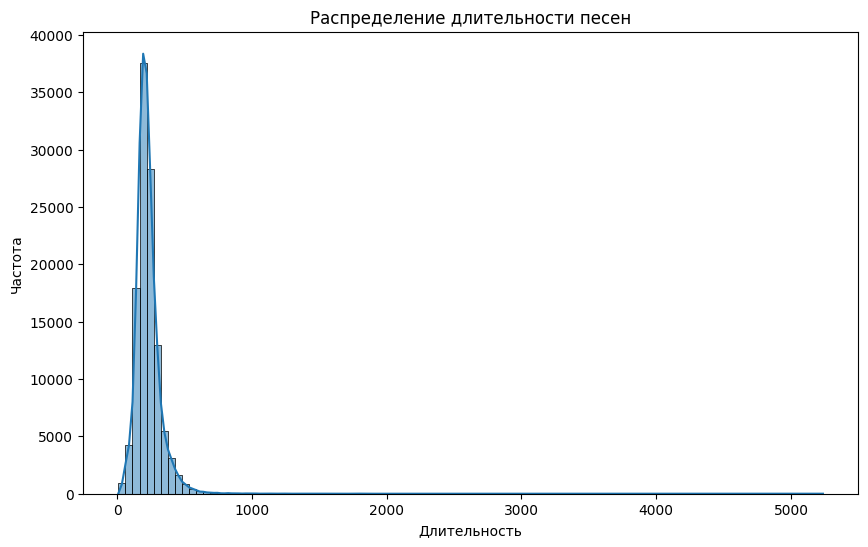

In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(df['duration_s'], bins=100, kde=True)

plt.title('Распределение длительности песен')

plt.xlabel('Длительность')

plt.ylabel('Частота')

plt.show()

In [14]:
df[df['duration_s'] > 1000].shape[0]

115

In [15]:
df[df['duration_s'] > 500].shape[0]

1559

In [16]:
df[df['duration_s'] <= 1000].shape[0]

113884

In [17]:
df[df['duration_s'] <= 500].shape[0]

112440

**Вывод:**

Судя по полученным данным анализа и графику, мы видим, что в датасете присутствуют выбросы по длительности. Это песни, у которых длительность превышает 500 секунд, то есть примерно 8 минут и их популярность около нулевая.

Можно пренебречь треками длина которых превышает 500 секунд.


#### 3. Проверим как длительность влияет на популярность трека

In [18]:
# Создаем таблицу с треками длительность которых меньше 500 секунд

df_filtered = df[df['duration_s'] <= 500]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


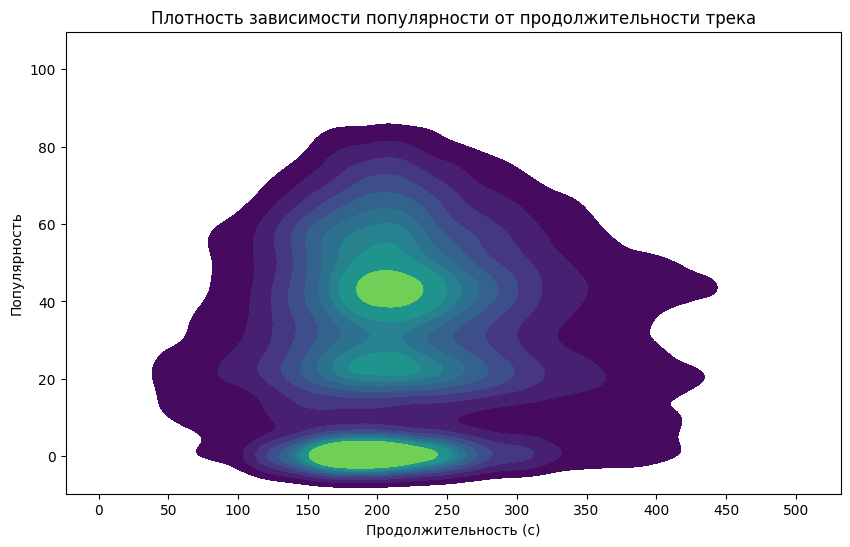

In [19]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_filtered, x="duration_s", y="popularity", cmap="viridis", fill=True)

max_duration = df_filtered['duration_s'].max()

plt.xticks(range(0, int(max_duration) + 50, 50))

plt.title("Плотность зависимости популярности от продолжительности трека")

plt.xlabel("Продолжительность (с)")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Авторы стараются создавать песни, которые смогут попасть на радио и стать популярными, поэтому делают их длительностью примерно 3 минуты.

Судя по графику существует 2 большие группы треков по продолжительности:

1. Низкая популярность и продолжительность от ~ 150 до 250 секунд (2.5 - 4 минут).

2. Средняя популярность ~ 40 - 50 и продолжительность ~ 175 до 225 секунд ("Радиоформат" - примерно 3 минуты).


Можно выделить категории продолжительности:

* short - [0; 120] секунд

* standart - (120; 240] секунд

* long - (240; ...] секунд


### Зависимость популярности от наличия откровенного контента

In [20]:
df["explicit"].describe()

count     113999
unique         2
top        False
freq      104252
Name: explicit, dtype: object

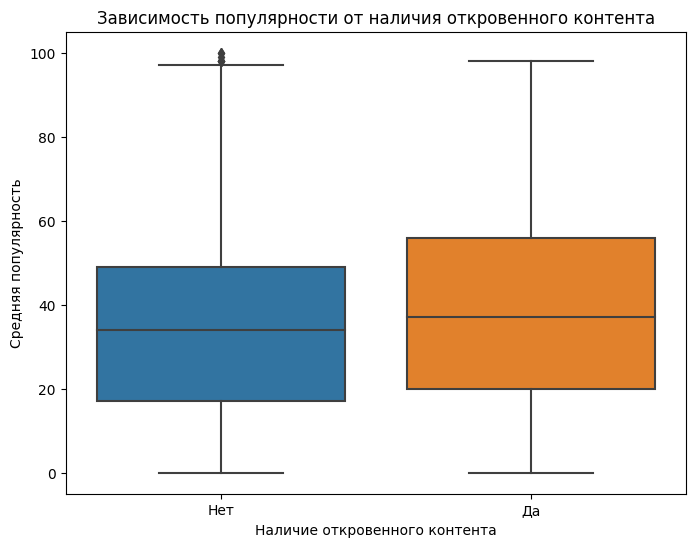

In [21]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x="explicit", y="popularity")

plt.title("Зависимость популярности от наличия откровенного контента")

plt.xlabel("Наличие откровенного контента")

plt.ylabel("Средняя популярность")

plt.xticks([0, 1], ["Нет", "Да"])

plt.show()

**Вывод:**

Популярность треков с нецензурной лексикой выше, это может свидетельствовать о предпочтении слушателей к более нецензурному контенту. Однако, разница минимальна, а значит, что наличие нецензурной лексики не является ключевым фактором популярности.




### Зависимость популярности от танцевальности

In [22]:
df["danceability"].describe()

count    113999.000000
mean          0.566801
std           0.173543
min           0.000000
25%           0.456000
50%           0.580000
75%           0.695000
max           0.985000
Name: danceability, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


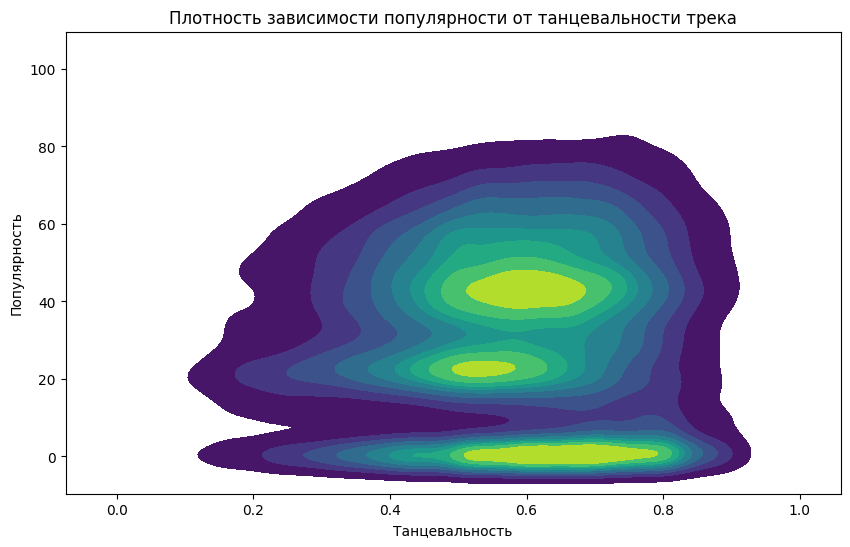

In [23]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="danceability", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от танцевальности трека")

plt.xlabel("Танцевальность")

plt.ylabel("Популярность")

plt.show()

/tmp/ipykernel_23/2802238617.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  danceability_popularity = df.groupby('danceability_bins')['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


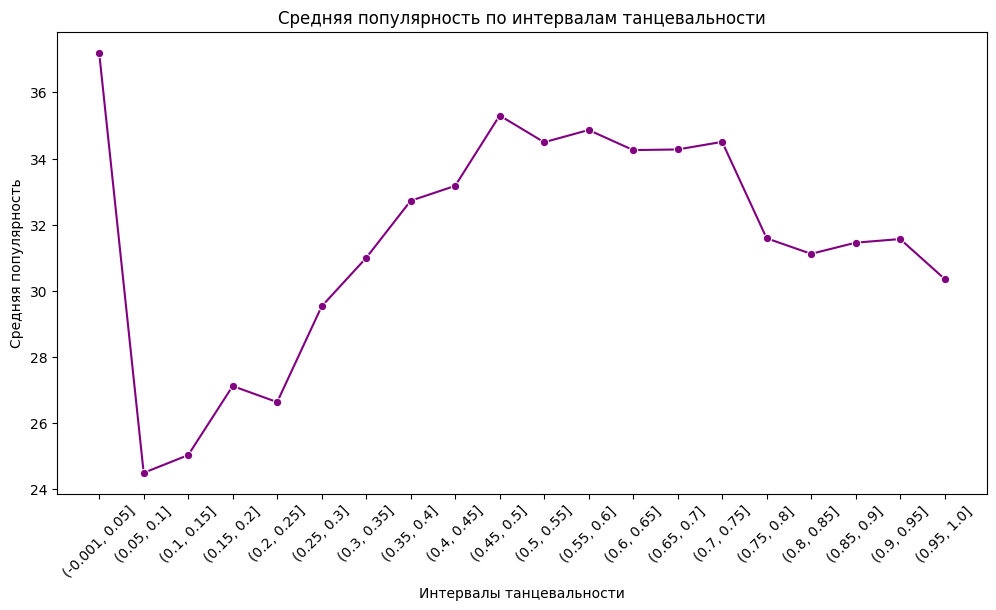

In [24]:
# Создаем интервалы для танцевальности

bins = np.linspace(0, 1, 21)

df['danceability_bins'] = pd.cut(df['danceability'], bins=bins, include_lowest=True)



# Средняя популярность по каждому интервалу танцевальности

danceability_popularity = df.groupby('danceability_bins')['popularity'].mean()



plt.figure(figsize=(12, 6))

sns.lineplot(x=danceability_popularity.index.astype(str), y=danceability_popularity.values, marker="o", color="purple")

plt.title("Средняя популярность по интервалам танцевальности")

plt.xlabel("Интервалы танцевальности")

plt.ylabel("Средняя популярность")

plt.xticks(rotation=45)

plt.show()


**Вывод:**

* Большинство треков находится в диапазоне от 0.5 до 0.8 по танцевальности.

* Средняя популярность растет с увеличением танцевальности до 0.45–0.55, где достигает пика.
  
* После танцевальности 0.55–0.6 средняя популярность начинает плавно снижаться.

Можно выделить категории:



* Сбалансированные треки (0.4–0.6): Наиболее популярные.

* Сложные для восприятия (0.0–0.3): Могут быть использованы в узких жанрах или для специфических аудиторий.

* Ограниченно популярные (0.7–1.0): Подходят для танцевальных вечеринок, но ограничены в массовом успехе.



### Зависимость популярности от энергичсности

In [25]:
df["energy"].describe()

count    113999.000000
mean          0.641383
std           0.251530
min           0.000000
25%           0.472000
50%           0.685000
75%           0.854000
max           1.000000
Name: energy, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


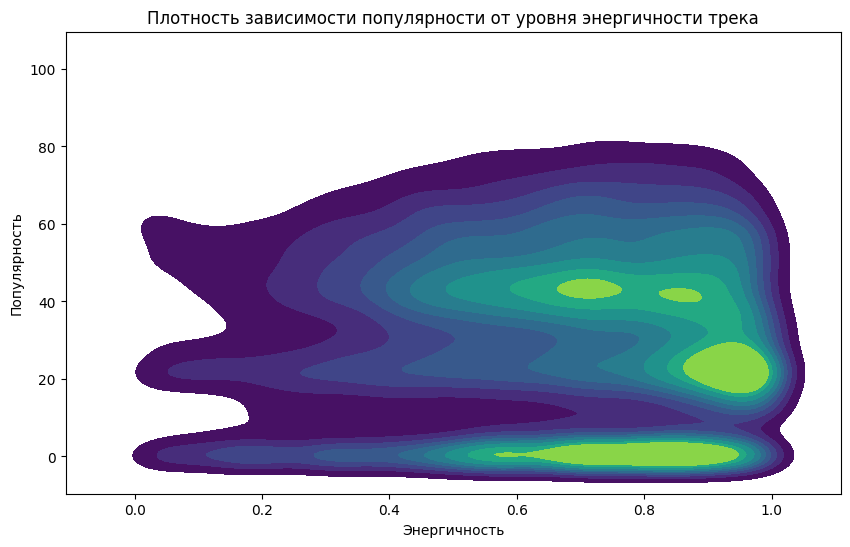

In [26]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="energy", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от уровня энергичности трека")

plt.xlabel("Энергичность")

plt.ylabel("Популярность")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


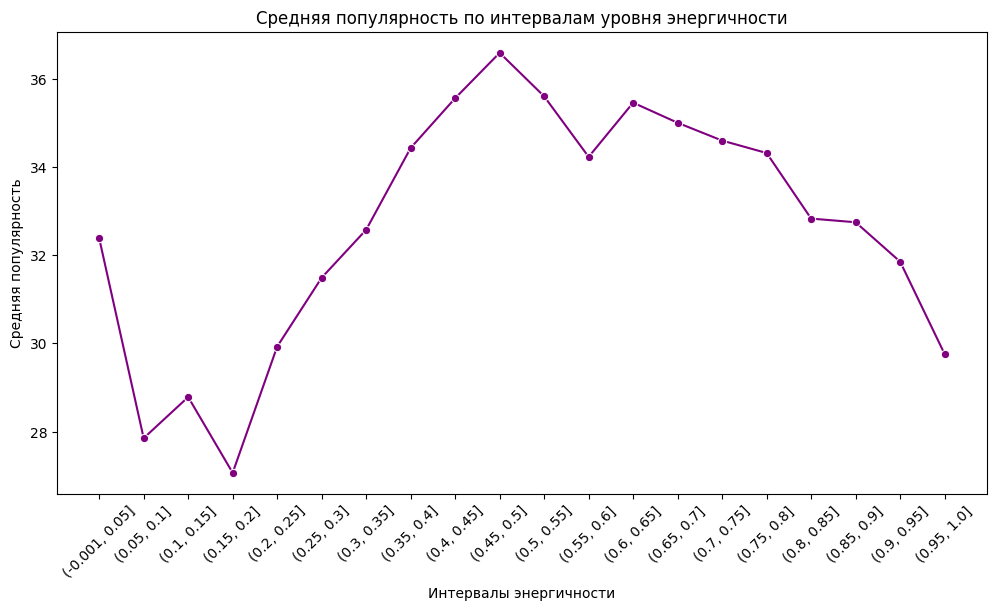

In [27]:
# Создаем интервалы для уровня энергичности
bins = np.linspace(0, 1, 21)

df['energy_bins'] = pd.cut(df['energy'], bins=bins, include_lowest=True)



# Средняя популярность по каждому интервалу уровня энергичности

energy_popularity = df.groupby('energy_bins', observed=False)['popularity'].mean()



plt.figure(figsize=(12, 6))

sns.lineplot(x=energy_popularity.index.astype(str), y=energy_popularity.values, marker="o", color="purple")

plt.title("Средняя популярность по интервалам уровня энергичности")

plt.xlabel("Интервалы энергичности")

plt.ylabel("Средняя популярность")

plt.xticks(rotation=45)

plt.show()

**Вывод:**

* Большинство треков находится в диапазоне от 0.6 до 1 по энергичности

* Средняя популярность растет с увеличением энергичности до 0.45 – 0.55, где достигает пика.
  
* После энергичности 0.65 – 0.7 средняя популярность начинает плавно снижаться.

Можно выделить категории:

* Сбалансированные треки (0.4 – 0.8): Наиболее популярные.

* Унылые (0.0 – 0.3): Могут быть использованы в узких жанрах или для специфических аудиторий.

* Ограниченно популярные (0.8 – 1.0): Подходят для танцевальных вечеринок, но ограничены в массовом успехе.

### Зависимость популярности от тональности

In [28]:
df["key"].describe()

count    113999.000000
mean          5.309126
std           3.559999
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          11.000000
Name: key, dtype: float64

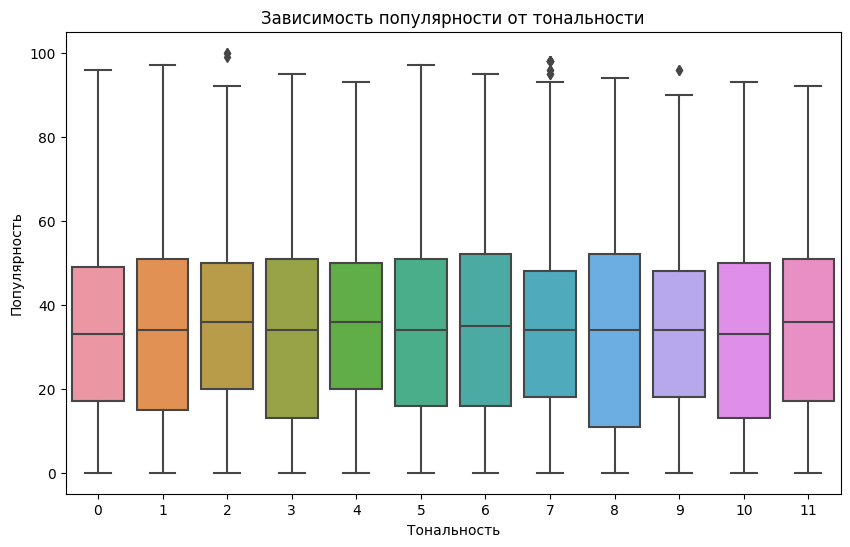

In [29]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="key", y="popularity")

plt.title("Зависимость популярности от тональности")

plt.xlabel("Тональность")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Тональность особо никак не влияет на популярность.

### Зависимость популярности от громкости

In [30]:
df["loudness"].describe()

count    113999.000000
mean         -8.258950
std           5.029357
min         -49.531000
25%         -10.013000
50%          -7.004000
75%          -5.003000
max           4.532000
Name: loudness, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


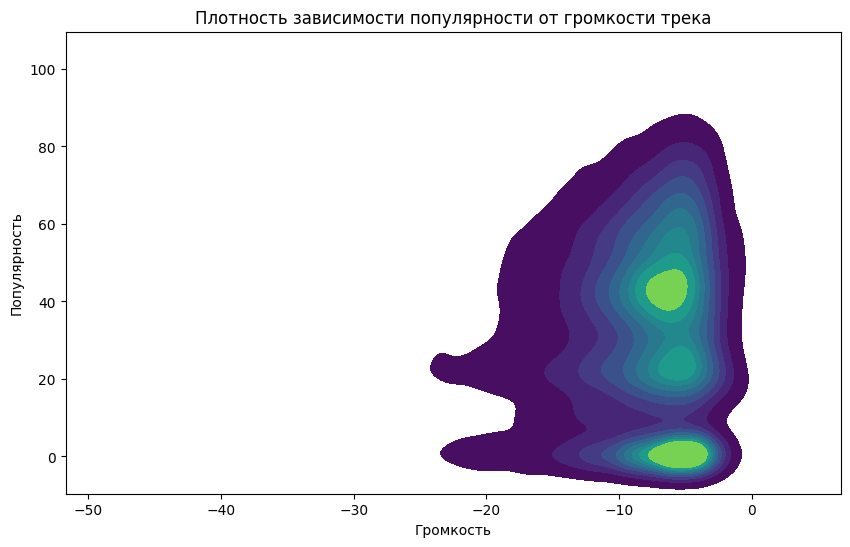

In [31]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="loudness", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от громкости трека")

plt.xlabel("Громкость")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Слушатели не любят слишком тихие треки, поэтому популярными становятся средние по громкости.

### Зависимость популярности от модальности

In [32]:
df["mode"].describe()

count    113999.000000
mean          0.637558
std           0.480708
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: mode, dtype: float64

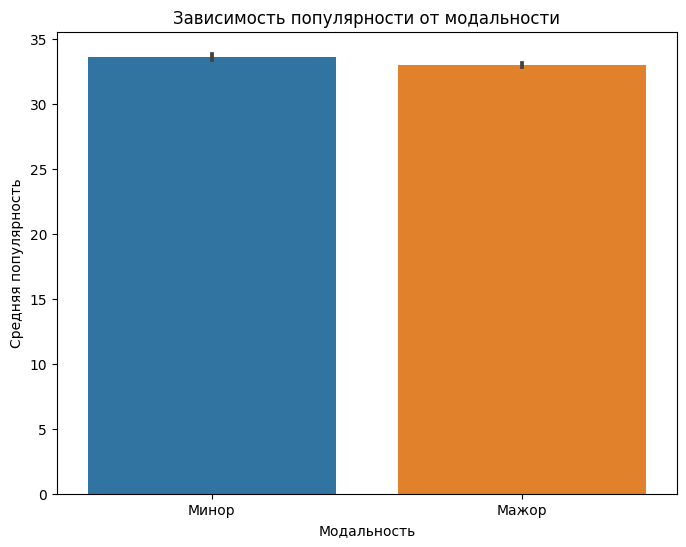

In [33]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x="mode", y="popularity")

plt.title("Зависимость популярности от модальности")

plt.xlabel("Модальность")

plt.ylabel("Средняя популярность")

plt.xticks([0, 1], ["Минор", "Мажор"])

plt.show()

**Вывод:**

Модальности никак не влияет на популярность.

### Зависимость популярности от процента слов в песне

In [34]:
df["speechiness"].describe()

count    113999.000000
mean          0.084652
std           0.105733
min           0.000000
25%           0.035900
50%           0.048900
75%           0.084500
max           0.965000
Name: speechiness, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


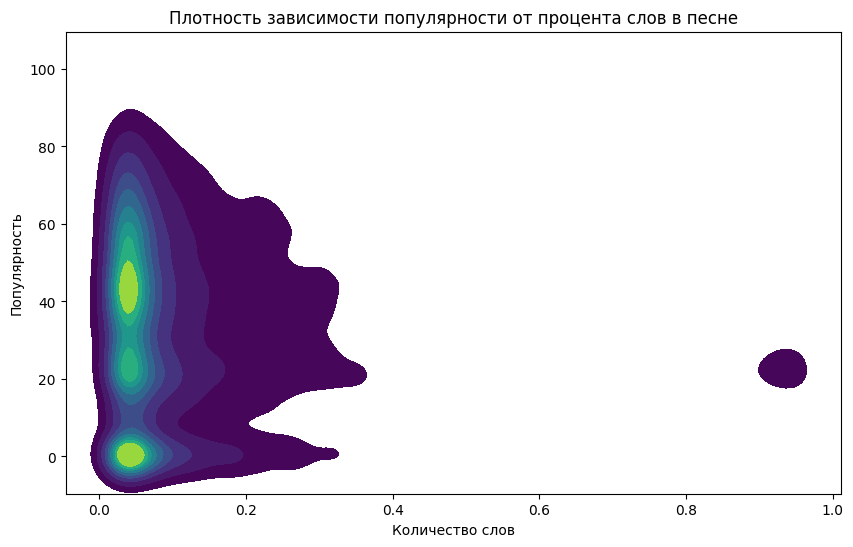

In [35]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="speechiness", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от процента слов в песне")

plt.xlabel("Количество слов")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

В основном в треках не так много слов и это особо не влияет на популярность.

### Зависимость популярности от акустичности

In [36]:
df["acousticness"].describe()

count    113999.000000
mean          0.314907
std           0.332522
min           0.000000
25%           0.016900
50%           0.169000
75%           0.597500
max           0.996000
Name: acousticness, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


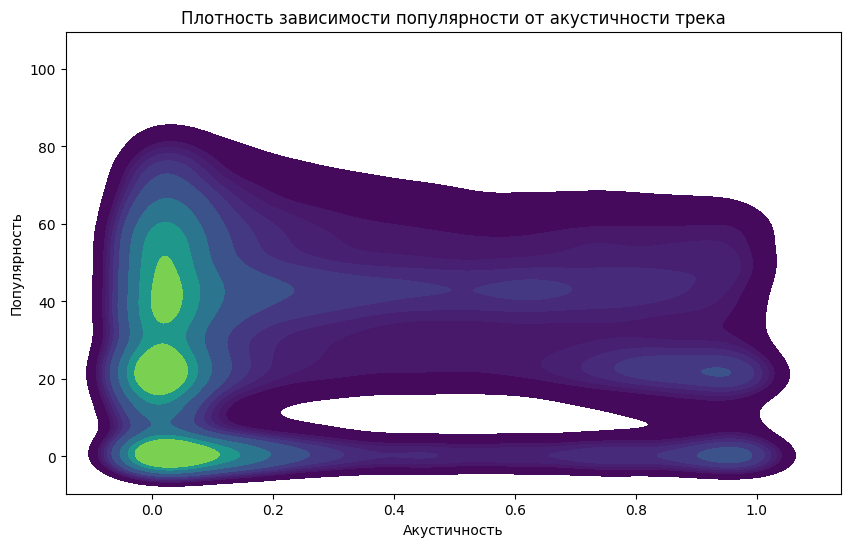

In [37]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="acousticness", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от акустичности трека")

plt.xlabel("Акустичность")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Треки в основном не особо акустичны и это несильно влияет на популярность.

### Зависимость популярности от инструментальности

In [38]:
df["instrumentalness"].describe()

count    113999.000000
mean          0.156051
std           0.309556
min           0.000000
25%           0.000000
50%           0.000042
75%           0.049000
max           1.000000
Name: instrumentalness, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


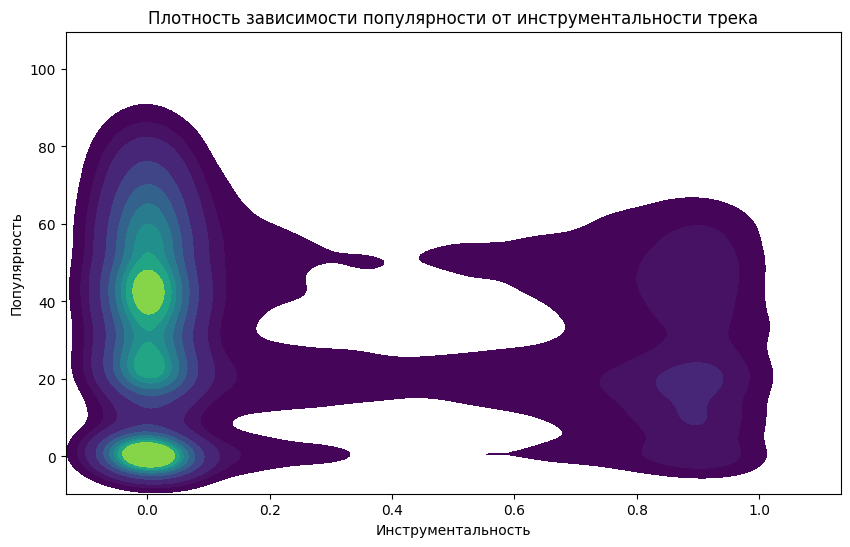

In [39]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="instrumentalness", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от инструментальности трека")

plt.xlabel("Инструментальность")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Треки по инструментальности можно разделить на две группы (небольшая и большая инструментальность) треки с небольшой популярнее.

### Зависимость популярности от уровня присутствия живой аудитории

In [40]:
df["liveness"].describe()

count    113999.000000
mean          0.213554
std           0.190378
min           0.000000
25%           0.098000
50%           0.132000
75%           0.273000
max           1.000000
Name: liveness, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


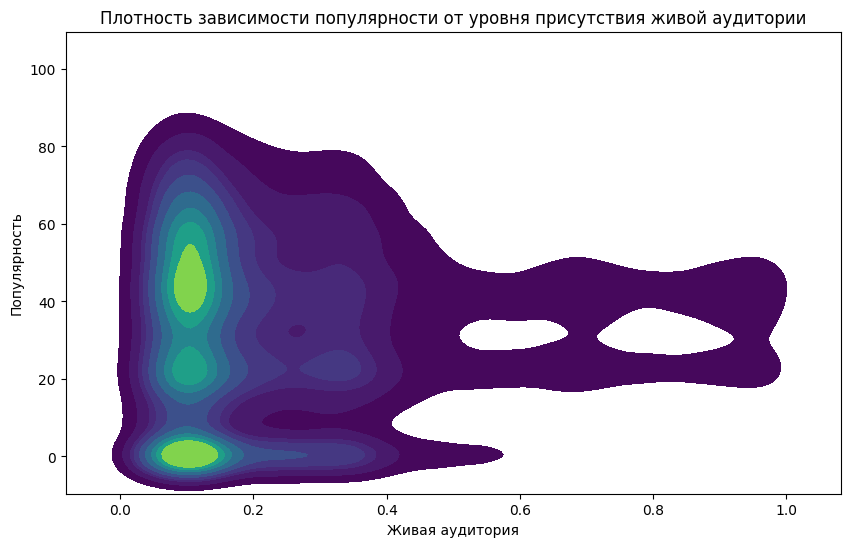

In [41]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="liveness", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от уровня присутствия живой аудитории")

plt.xlabel("Живая аудитория")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Особо не влияет.

### Зависимость популярности от валентности

In [42]:
df["valence"].describe()

count    113999.000000
mean          0.474066
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


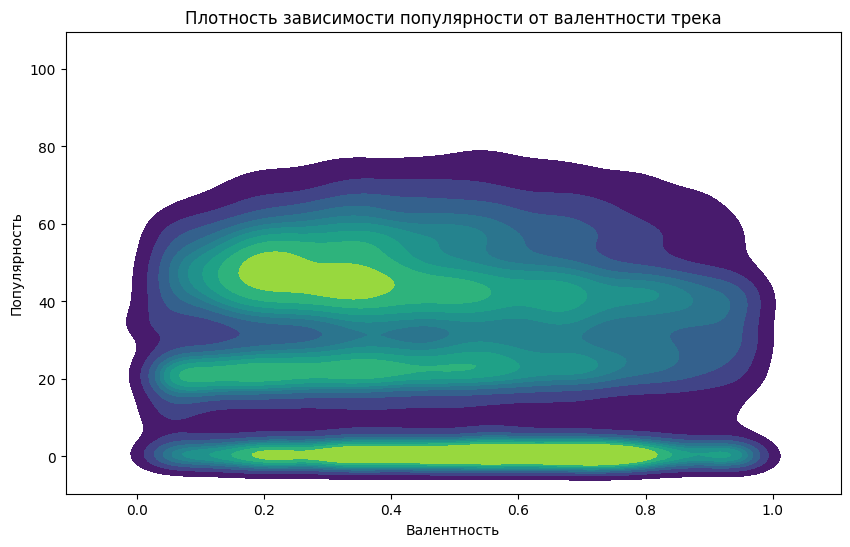

In [43]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="valence", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от валентности трека")

plt.xlabel("Валентность")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Треки по валентности распределены примерно равноверно, самая высокая популярность у треков со средим значением.

### Зависимость популярности от темпа

In [44]:
df["tempo"].describe()

count    113999.000000
mean        122.147695
std          29.978290
min           0.000000
25%          99.218500
50%         122.017000
75%         140.071000
max         243.372000
Name: tempo, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


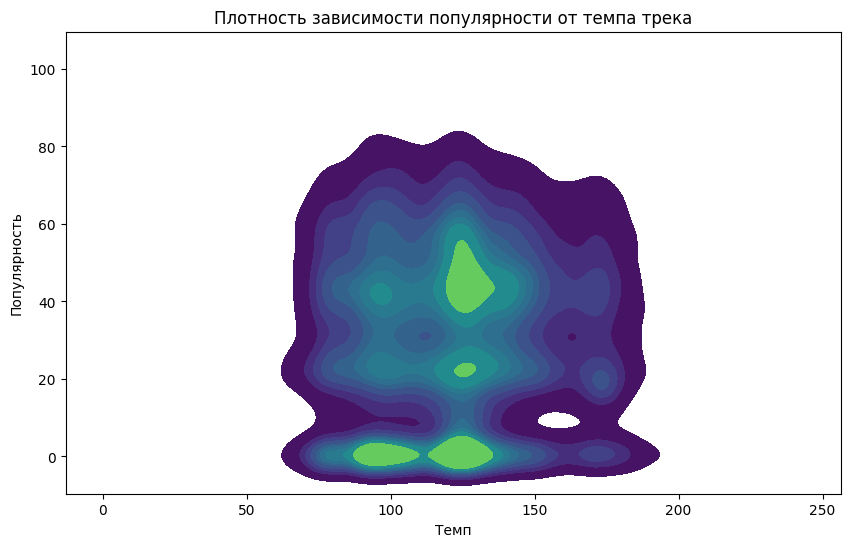

In [45]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x="tempo", y="popularity", cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от темпа трека")

plt.xlabel("Темп")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Средний темп положительно влияет на популярность.

### Зависимость популярности от размерности

In [46]:
df["time_signature"].describe()

count    113999.000000
mean          3.904034
std           0.432623
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

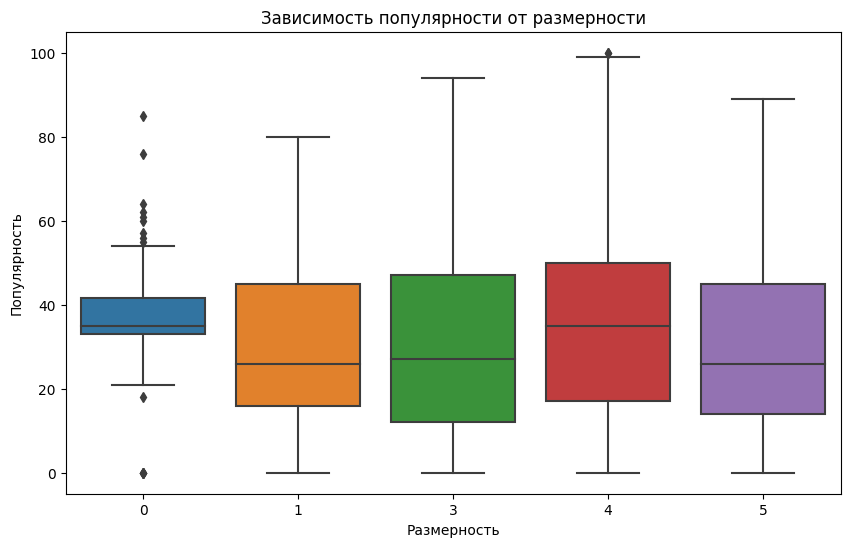

In [47]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="time_signature", y="popularity")

plt.title("Зависимость популярности от размерности")

plt.xlabel("Размерность")

plt.ylabel("Популярность")

plt.show()

**Вывод:**

Большинство треков имеют размерность 4 и это практически никак не влияет на популярность.

### Зависимость популярности от жанра

In [48]:
df["track_genre"].describe()

count          113999
unique            114
top       world-music
freq             1000
Name: track_genre, dtype: object

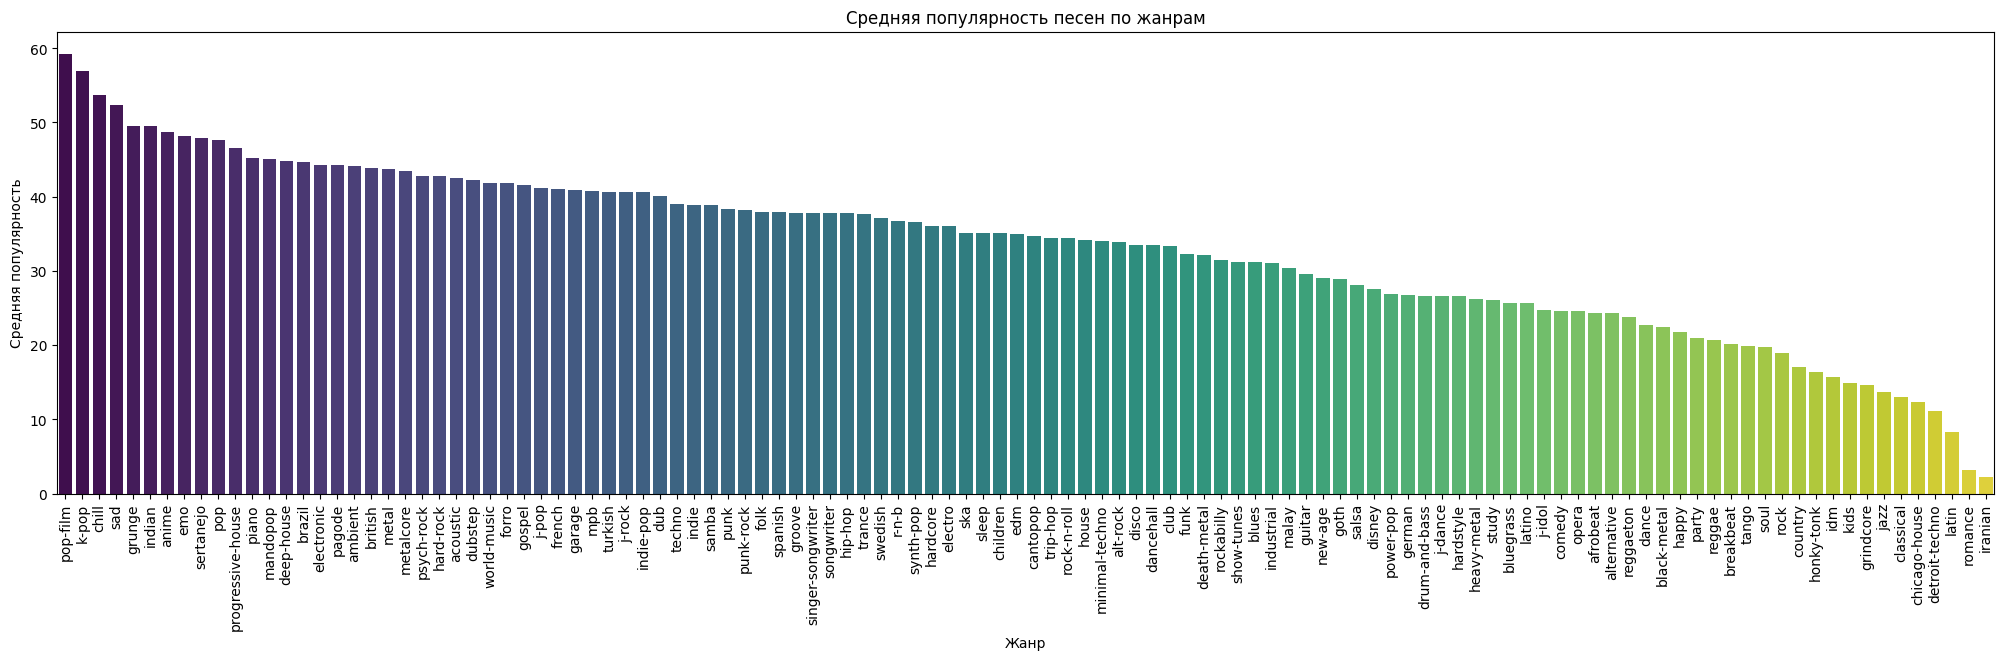

In [49]:
plt.figure(figsize=(25, 6))
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, palette='viridis')
plt.title("Средняя популярность песен по жанрам")
plt.xticks(rotation=90)
plt.xlabel("Жанр")
plt.ylabel("Средняя популярность")
plt.show()

**Вывод:** 

Самые популярные жанры на тот момент - pop film, k-pop, chill и sad. Жанр явно влияет на популярность песни.

### Кореляция числовых данных

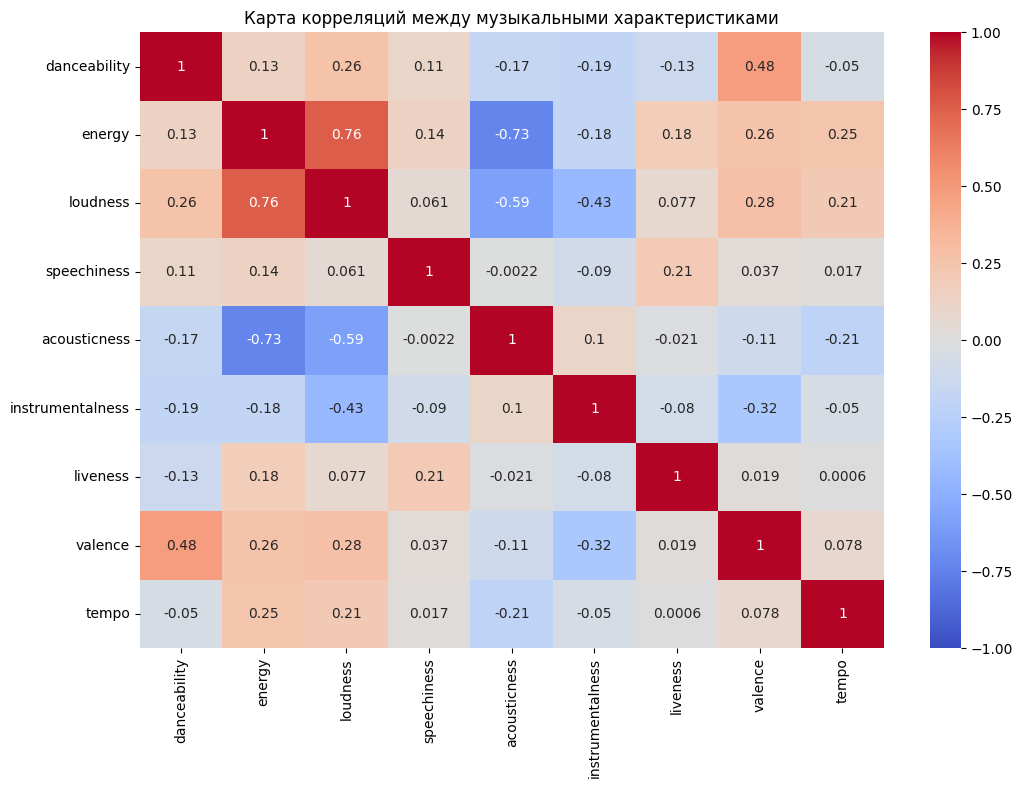

In [50]:
plt.figure(figsize=(12, 8))

correlation_matrix = df[["danceability", "energy", "loudness", "speechiness", "acousticness",

                         "instrumentalness", "liveness", "valence", "tempo"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Карта корреляций между музыкальными характеристиками")

plt.show()

**Вывод:**

* Наблюдается высокая положительная корреляция между energy и loudness, что логично, так как более громкие треки обычно передают больше энергии.
  
* acousticness имеет отрицательную корреляцию с energy и loudness, что показывает, что акустические треки обычно тише и менее энергичны.

* Низкая или нулевая корреляция между speechiness, liveness и другими характеристиками указывает на то, что эти признаки имеют независимые вариации и могут описывать уникальные аспекты трека.

## Feature engineering

### 1. Категории продолжителности

In [51]:
df['duration_category'] = pd.cut(df['duration_s'], bins=[0, 120, 240, 2000], labels=['short', 'standart', 'long'])

* short - [0; 120] секунд
* standart - (120; 240] секунд
* long - (240; ...] секунд

Категории могут помочь лучше понять различия в популярности треков с различной продолжительностью.

### 2. Категории танцевальности

In [52]:
df['danceability_category'] = pd.cut(df['danceability'], bins=[0, 0.4, 0.7, 1], labels=['low', 'balanced', 'high'])


* Сложные для восприятия [0.0; 0.4]: Могут быть использованы в узких жанрах или для специфических аудиторий.
* Сбалансированные треки (0.4; 0.7]: Наиболее популярные.
* Ограниченно популярные (0.7; 1.0]: Подходят для танцевальных вечеринок, но ограничены в массовом успехе.
ехе.

### 2. Категории энергичности

In [53]:
df['energy_category'] = pd.cut(df['energy'], bins=[0, 0.4, 0.8, 1], labels=['calm', 'balanced', 'active'])


* Спокойные [0.0; 0.4]: Могут быть использованы в узких жанрах или для специфических аудиторий.
* Сбалансированные треки (0.4; 0.8]: Наиболее популярные.
* Активные (0.8; 1.0]: Подходят для танцевальных вечеринок, но ограничены в массовом успехе
пехе

### 3. Нормализация громкости

In [54]:
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())

Приводит громкость к диапазону от 0 до 1. Нормализация важна, так как она устраняет эффект масштаба и делает признак пригодным для моделей, чувствительных к масштабированию.

### 3. Отношения вокальности к инструментальности

In [55]:
df['speech_instrument_ratio'] = df['speechiness'] / (df['instrumentalness'] + 1e-9)

speech_instrument_ratio — отношение вокального компонента к инструментальному. Высокое значение показывает, что трек больше сосредоточен на вокале, чем на инструментальных фрагментах.

### 4. Отношения акустичности к инструментальности

In [56]:
df['acoustic_instrument_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-9)

acoustic_instrument_ratio — соотношение акустического компонента и инструментальности. Высокие значения показывают, что трек больше зависит от акустики, чем от инструментальности.

### 5. Отношения танцевальности к энергичности

In [57]:
df['dance_energy_ratio'] = df['danceability'] / (df['energy'] + 1e-9)

dance_energy_ratio — отношение танцевальности к энергии, чтобы выяснить, насколько сильно энергетика трека влияет на его танцевальность.

### 6. Позитивность

In [58]:
df['positivity'] = df['energy'] * df['valence']

Позитивность - это произведение показателей энергии и валентности (настроения), которое может характеризовать общую "весёлость" или позитивную энергию трека.

## Исправление типов

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   artists                    113999 non-null  object  
 1   album_name                 113999 non-null  object  
 2   popularity                 113999 non-null  int64   
 3   duration_ms                113999 non-null  int64   
 4   explicit                   113999 non-null  bool    
 5   danceability               113999 non-null  float64 
 6   energy                     113999 non-null  float64 
 7   key                        113999 non-null  int64   
 8   loudness                   113999 non-null  float64 
 9   mode                       113999 non-null  int64   
 10  speechiness                113999 non-null  float64 
 11  acousticness               113999 non-null  float64 
 12  instrumentalness           113999 non-null  float64 
 13  liveness           

In [60]:
df.shape

(113999, 29)

In [61]:
numerical_features = df.select_dtypes(include=['number', 'float64', 'int64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [62]:
categorical_features

['artists',
 'album_name',
 'track_genre',
 'danceability_bins',
 'energy_bins',
 'duration_category',
 'danceability_category',
 'energy_category']

In [63]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_features:

    le = LabelEncoder()

    df[col] = le.fit_transform(df[col])

## Кореляция признаков с таргетом

In [64]:
# Исключим категориальные и булевые столбцы
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

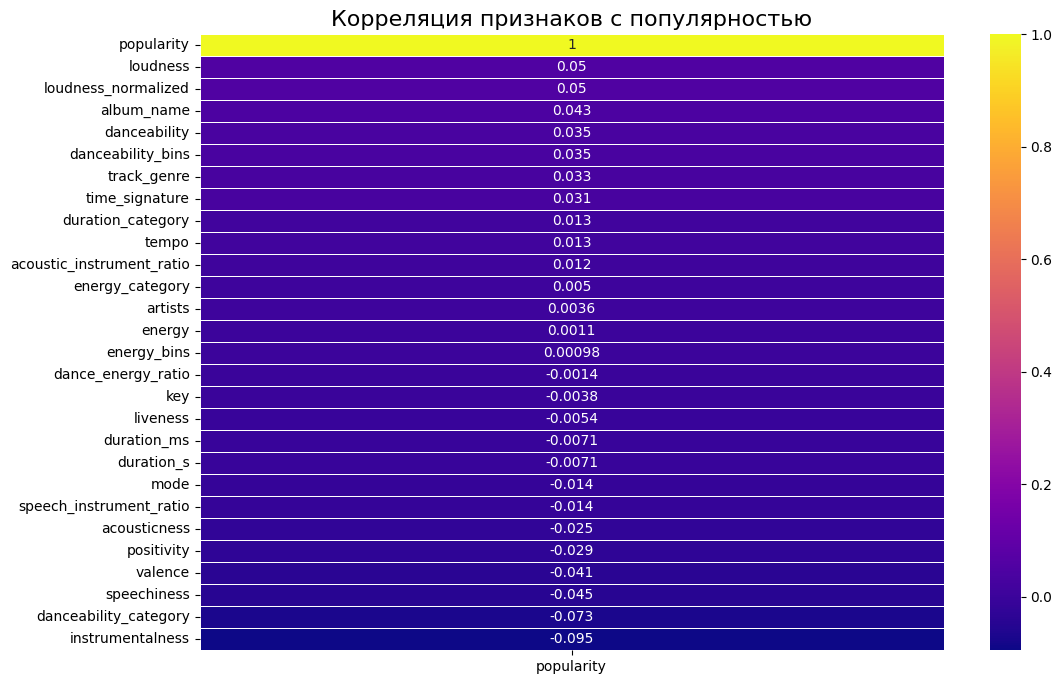

popularity                   1.000000
loudness                     0.050420
loudness_normalized          0.050420
album_name                   0.042501
danceability                 0.035444
danceability_bins            0.035161
track_genre                  0.032696
time_signature               0.031076
duration_category            0.013239
tempo                        0.013212
acoustic_instrument_ratio    0.011796
energy_category              0.005011
artists                      0.003636
energy                       0.001053
energy_bins                  0.000979
dance_energy_ratio          -0.001416
key                         -0.003847
liveness                    -0.005397
duration_ms                 -0.007129
duration_s                  -0.007129
mode                        -0.013948
speech_instrument_ratio     -0.014442
acousticness                -0.025458
positivity                  -0.029292
valence                     -0.040522
speechiness                 -0.044930
danceability

In [65]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
    annot=True, annot_kws={"size": 10},
    cmap='plasma',
    cbar=True,
    linewidths=0.5
)
plt.title('Корреляция признаков с популярностью', fontsize=16)
plt.show()

top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)

## Эксперименты с моделями

### 1. Определение метрик


* MAE (Mean Absolute Error) — средняя абсолютная ошибка. Показывает среднее отклонение предсказаний от фактических значений.
* MSE (Mean Squared Error) — среднеквадратическая ошибка. Возводит отклонения в квадрат, делая крупные ошибки более заметными.
* RMSE (Root Mean Squared Error) — корень из среднеквадратической ошибки. Корень из MSE, возвращая ошибку к изначальной размерности.
* MAPE (Mean Absolute Percentage Error) — средняя абсолютная процентная ошибка. Выражает среднюю абсолютную ошибку в процентах, что удобно для интерпретации. (Убрал т.к. показывает плохие значения из-за нулевых значений в таргете)
* R² (R-Squared) — коэффициент детерминации. Доля дисперсии, объяснённой моделью (чем ближе к 1, тем лучше).чше).

### 2. Разделение данных на обучающую и тестовую выборки

In [66]:
# Разделение данных на обучающую и тестовую выборки

X = df.drop(columns=['popularity'])

y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    return metrics

### 3. Нормализация данных

In [68]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Эксперимент 1: Линейная модель

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Модель
linear_model = LinearRegression()

# Кросс-валидация
y_pred = cross_val_predict(linear_model, X_train, y_train, cv=5)

# Оценка
metrics_linear = evaluate_model(y_train, y_pred)
print('Линейная модель:', metrics_linear)

Линейная модель: {'MAE': 18.28564801615282, 'MSE': 482.28647062266685, 'RMSE': 21.96102162065023, 'R2': 0.031248425008404523}


Плюсы:
- MAE: Средняя абсолютная ошибка 18.28 указывает на допустимое среднее отклонение предсказаний от истинных значений.
- R²: Коэффициент детерминации (0.031) положительный, но очень близок к нулю, что говорит о том, что модель объясняет очень малую часть дисперсии целевой переменной.

Минусы:
- RMSE: Высокое значение (21.96) говорит о крупных ошибках.
- MAPE: Значение равно inf, что вызвано наличием нулевых значений в целевой переменной (y). 

Вывод:
Линейная модель плохо справляется с задачей. Низкое значение R² и высокий RMSE свидетельствуют о необходимости улучшений.

### Эксперимент 2: Дерево решений

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Модель
tree_model = DecisionTreeRegressor(random_state=42)

# Кросс-валидация
y_pred = cross_val_predict(tree_model, X_train, y_train, cv=5)

# Оценка
metrics_tree = evaluate_model(y_train, y_pred)
print('Дерево решений:', metrics_tree)

Дерево решений: {'MAE': 13.811304583018089, 'MSE': 473.44568440687095, 'RMSE': 21.75880705385456, 'R2': 0.04900659591388079}


Плюсы:

* MAE: Снижение средней абсолютной ошибки до 13.79 (по сравнению с линейной моделью — 18.28) говорит о лучшем качестве предсказаний.
* MSE и RMSE: Незначительное улучшение (RMSE: 21.72 против 21.96 у линейной модели), но этого недостаточно для значимого прогресса.
* R²: Коэффициент детерминации (0.052) немного выше, чем у линейной модели (0.031), но по-прежнему очень низкий, что указывает на слабую объяснительную способность.



Минусы:
* MAPE: Остался inf из-за нулей в целевой переменной.

Вывод:

Дерево решений лучше справляется с задачей, чем линейная модель, особенно по метрике MAE.
Однако, общее качество модели по-прежнему оставляет желать лучшего, о чем свидетельствуют высокий RMSE и низкий R².
Учитывая природу задачи (смешение нулей и ненулей в целевой переменной), деревья решений могут быть недостаточно гибкими.

### Эксперимент 3: Градиентный бустинг

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Модель
boosting_model = GradientBoostingRegressor(random_state=42)

# Кросс-валидация
y_pred = cross_val_predict(boosting_model, X_train, y_train, cv=5)

# Оценка
metrics_boosting = evaluate_model(y_train, y_pred)
print('Градиентный бустинг:', metrics_boosting)

Градиентный бустинг: {'MAE': 15.985189811032063, 'MSE': 390.59383968377136, 'RMSE': 19.76344705975583, 'R2': 0.21542813156848184}


**Плюсы:**

* MAE: Средняя абсолютная ошибка (15.98) показывает снижение ошибки предсказаний относительно линейной модели (18.28).
* R²: Коэффициент детерминации (0.215) заметно выше, чем у линейной модели (0.031) и дерева решений (0.052), что говорит о лучшей объяснительной способности модели.
* RMSE: Снижение ошибки до 19.76 по сравнению с линейной моделью (21.96) и деревом решений (21.72) указывает на меньшее количество крупных ошибок.Минусы:


**Вывод:**

Градиентный бустинг показывает значительное улучшение по сравнению с линейной моделью и деревом решений, особенно по метрике R². 

### Эксперимент 4: xgboost

In [72]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Создание модели XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=50, random_state=42)

# Кросс-валидация с 5 фолдами
y_pred = cross_val_predict(xgboost_model, X_train, y_train, cv=5)

# Оценка модели
metrics_xgboost = evaluate_model(y_train, y_pred)
print('XGB бустинг:',metrics_xgboost)

XGB бустинг: {'MAE': 12.901139183013777, 'MSE': 288.83761675867987, 'RMSE': 16.99522335124431, 'R2': 0.41982221522711904}


**Плюсы:**


* MAE: Самая низкая ошибка среди всех моделей (12.90), что свидетельствует о высокой точности предсказаний.
* R²: Коэффициент детерминации (0.42) значительно превышает результаты остальных моделей, что говорит о лучшей объяснительной способности.
* RMSE: Минимальная ошибка (16.99) показывает наименьшие отклонения в крупных ошибках по сравнению с другими моделями.



**Вывод:**

XGB бустинг демонстрирует лучший результат по всем метрикам среди рассмотренных моделей. Низкие значения MAE и RMSE, а также высокий R² указывают на значительное улучшение качества предсказаний. 

### Эксперимент 5: Нейронная сеть

#### 1. Создание модели

In [73]:
from tensorflow.keras import regularizers

nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                      kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2. Компиляция модели

In [74]:
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### 4. Тренировка модели

In [75]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)
history = nn_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    verbose=1,
    validation_split=0.2,
    validation_data=(X_train, y_train), 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


I0000 00:00:1734530232.139040      73 service.cc:145] XLA service 0x7a4f6c004d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734530232.139130      73 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734530232.139137      73 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 109/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1499.4080 - mae: 32.0433

I0000 00:00:1734530235.545291      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 730.4957 - mae: 21.7185 - val_loss: 496.1385 - val_mae: 18.2487 - learning_rate: 0.0010
Epoch 2/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 556.7299 - mae: 19.1926 - val_loss: 486.5773 - val_mae: 18.1536 - learning_rate: 0.0010
Epoch 3/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 534.8711 - mae: 18.9099 - val_loss: 479.1940 - val_mae: 18.0232 - learning_rate: 0.0010
Epoch 4/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 529.8339 - mae: 18.8688 - val_loss: 477.2095 - val_mae: 18.0235 - learning_rate: 0.0010
Epoch 5/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 522.9717 - mae: 18.7949 - val_loss: 478.4505 - val_mae: 18.1140 - learning_rate: 0.0010
Epoch 6/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 515.5731 - mae: 18.6856 - val_loss: 477.6912 - val_mae: 18.0982 - learning_rate: 0.0010
Epoch 7/100
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 515.2189 - mae: 18.6828 - val_loss: 476.64

#### 5. Оценивание модели

2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Нейронная сеть: {'MAE': 17.915371449626676, 'MSE': 467.6682090961701, 'RMSE': 21.625637773165675, 'R2': 0.060611603824408444}


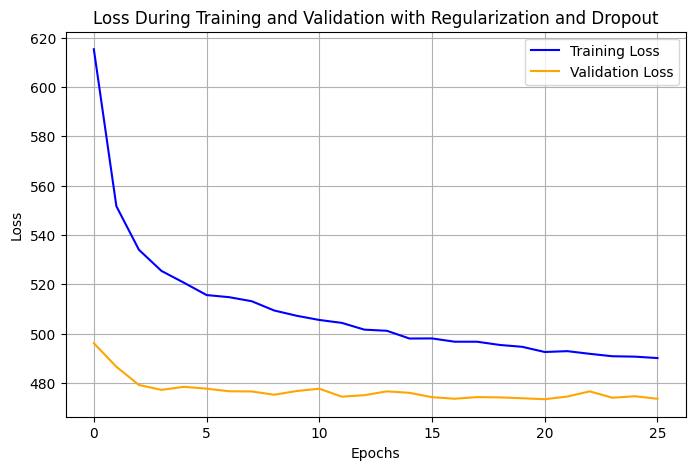

In [76]:
y_pred = nn_model.predict(X_train).flatten()

metrics_nn = evaluate_model(y_train, y_pred)
print('Нейронная сеть:', metrics_nn)

# Построение графика лосса
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss During Training and Validation with Regularization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**Плюсы:**


* MAE: Средняя абсолютная ошибка (17.86) близка к результату линейной модели (18.28), что указывает на допустимый уровень точности.
* R²: Коэффициент детерминации (0.064) немного выше, чем у линейной модели (0.031) и дерева решений (0.052).


**Минусы:**

* RMSE: Высокая ошибка (21.58) почти на уровне линейной модели (21.96) и дерева решений (21.72), что указывает на значительные отклонения.


**Вывод:**

Нейронная сеть не показала значительных улучшений по сравнению с линейной моделью и деревом решений. Несмотря на небольшое повышение R², высокое значение RMSE говорит о необходимости доработки модели для повышения её предсказательной способности.

### Кросс-валидация для лучшей модели (XGBoost)

#### 1. Инициализация модели

In [77]:
model = xgb.XGBRegressor(random_state=42, n_estimators=100)

#### 2. Кросс-валидация

In [78]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    X_kf_train, X_kf_val = X_train[train_index], X_train[val_index]
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Обучение модели на тренировочных данных
    model.fit(X_kf_train, y_kf_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_kf_val)
    
    # Вычисление метрик
    metrics = evaluate_model(y_kf_val, y_pred)
    fold_metrics.append(metrics)

    # Выводим результаты для текущего фолда
    print(f"Fold {fold}")
    print(f"Metrics: {metrics}")
    

# Финальный результат по всем фолдам
mean_metrics = {
    'MAE': np.mean([metric['MAE'] for metric in fold_metrics]),
    'MSE': np.mean([metric['MSE'] for metric in fold_metrics]),
    'RMSE': np.mean([metric['RMSE'] for metric in fold_metrics]),
    'R2': np.mean([metric['R2'] for metric in fold_metrics]),
}

print(f"\nСредние метрики по 5 фолдам:")
print(f"Средний MAE: {mean_metrics['MAE']}")
print(f"Средний MSE: {mean_metrics['MSE']}")
print(f"Средний RMSE: {mean_metrics['RMSE']}")
print(f"Средний R²: {mean_metrics['R2']}")

Fold 1
Metrics: {'MAE': 12.113611778892217, 'MSE': 258.7107127680612, 'RMSE': 16.0844867113645, 'R2': 0.4836096219858599}
Fold 2
Metrics: {'MAE': 12.114867039605171, 'MSE': 258.3437984383057, 'RMSE': 16.0730768192747, 'R2': 0.48088450382235803}
Fold 3
Metrics: {'MAE': 12.004817512965447, 'MSE': 256.4029265138703, 'RMSE': 16.012586502931693, 'R2': 0.4848381238355234}
Fold 4
Metrics: {'MAE': 12.021218460110367, 'MSE': 255.62802557464312, 'RMSE': 15.988371573573186, 'R2': 0.48560368421822686}
Fold 5
Metrics: {'MAE': 12.062428200252645, 'MSE': 258.4220719702941, 'RMSE': 16.07551156169825, 'R2': 0.47876819526860204}

Средние метрики по 5 фолдам:
Средний MAE: 12.063388598365169
Средний MSE: 257.5015070530349
Средний RMSE: 16.046806633768465
Средний R²: 0.48274082582611405


**Вывод:**

Результаты кросс-валидации показали стабильную работу модели на задаче регрессии. Средние значения метрик по 5 фолдам свидетельствуют о приемлемом уровне качества предсказаний:

* Средний MAE (Mean Absolute Error): 12.06
* Средний MSE (Mean Squared Error): 257.50
* Средний RMSE (Root Mean Squared Error): 16.05
* Средний R² (Коэффициент детерминации): 0.483


**Анализ:**

Ошибка предсказаний (MAE и RMSE) находится на схожем уровне во всех фолдах, что говорит о стабильности модели.
Коэффициент детерминации R² показывает, что модель объясняет около 48% дисперсии в данных. Хотя этот показатель нельзя считать идеальным, он указывает на наличие полезной информации в предсказаниях.
Различия между фолдами минимальны, что подтверждает надежность модели при различной разбивке данных на обучающую и тестовую выборки.

### Оценка важности признаков для xgboost_model

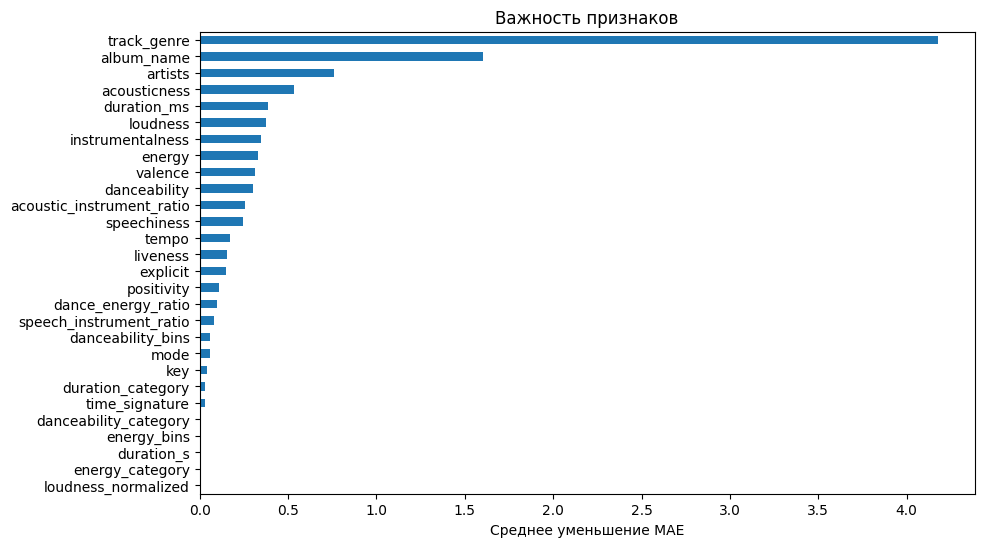

In [79]:
# Важность признаков с помощью permutation importance
xgboost_model.fit(X_train, y_train)
result = permutation_importance(xgboost_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

importances = pd.Series(result.importances_mean, index=X.columns)



# Визуализация важности признаков

importances.sort_values().plot(kind='barh', figsize=(10,6))

plt.title('Важность признаков')

plt.xlabel('Среднее уменьшение MAE')

plt.show()

**Ключевые признаки:**


* track_genre (жанр трека) имеет наибольшее влияние на предсказание модели. Это может указывать на то, что популярность песни сильно зависит от жанра.
* album_name (название альбома) и artists (исполнители) также играют значительную роль, что говорит о влиянии узнаваемости альбома или исполнителя на популярность.


**Акустические характеристики:**

* Такие признаки, как acousticness (акустичность), loudness (громкость) и instrumentalness (инструментальность), заметно влияют на результаты модели. Это подтверждает, что технические характеристики песни важны для её популярности.


**Второстепенные признаки:**


* Признаки вроде danceability (танцевальность), energy (энергия) и valence (эмоциональный тон) также играют некоторую роль, но их влияние значительно меньше.
* Характеристики, связанные с длительностью песни и тональностью (mode, key), имеют минимальное влияние, что может означать их слабую корреляцию с популярностью.


## Заключание

Результаты анализа показывают, что популярность трека зависит как от характеристик, связанных с жанром и громкостью, так и от эмоциональных и вокальных характеристик. Эти результаты можно использовать для:


* Оптимизации треков перед релизом.
* Формирования рекомендаций для исполнителей и продюсеров.
* Разработки рекомендационных систем на основе данных о предпочтениях пользователей.


Но не смотря на всё это мы не можем точно предсказывать будет трек популярным или нет, потому что популярность - метрика практически непредсказуемая, она зависит от слишком большого количества факторов, которые невозможно в полной мере собрать для каждого трека.
